<a href="https://colab.research.google.com/github/GhaziBenHenia/Convolutional_Neural_Network_for_COVID_19_Classification/blob/main/Convolutional_Neural_Network_for_COVID_19_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/DATA/data.zip # Décompresser votre base de données à partir du Drive

Archive:  /content/drive/MyDrive/DATA/data.zip
   creating: data/
   creating: data/TEST/
  inflating: data/TEST/COVID-19.jpeg  
  inflating: data/TEST/Healthy.jpeg  
   creating: data/TRAIN/
   creating: data/TRAIN/COVID-19/
  inflating: data/TRAIN/COVID-19/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: data/TRAIN/COVID-19/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: data/TRAIN/COVID-19/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: data/TRAIN/COVID-19/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: data/TRAIN/COVID-19/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_c

In [ ]:
import os
print('total Validation COVID-19 images:', len(os.listdir('/content/data/VAL/COVID-19')))
print('total Validation Healthy images:', len(os.listdir('/content/data/VAL/Healthy')))
print('total Training COVID-19 images:', len(os.listdir('/content/data/TRAIN/COVID-19')))
print('total Training Healthy images:', len(os.listdir('/content/data/TRAIN/Healthy')))

total Validation COVID-19 images: 5
total Validation Healthy images: 5
total Training COVID-19 images: 20
total Training Healthy images: 19


In [ ]:
train_dir = '/content/data/TRAIN'
validation_dir = '/content/data/VAL'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu',input_shape=(227, 227, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      147520    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 55, 55, 64)        0         
                                                                 
 flatten (Flatten)           (None, 193600)            0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   zoom_range=0.4,
                                   horizontal_flip=False,
                                   vertical_flip=True,
                                   fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=1,
    class_mode='binary')
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=1,
    class_mode='binary')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator,epochs=25, validation_data=validation_generator)

Epoch 1/25
39/39 [==============================] - 15s 86ms/step - loss: 3.2388 - accuracy: 0.4872 - val_loss: 0.8043 - val_accuracy: 0.5000
Epoch 2/25
39/39 [==============================] - 2s 54ms/step - loss: 0.7362 - accuracy: 0.5128 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 3/25
39/39 [==============================] - 2s 54ms/step - loss: 0.7342 - accuracy: 0.4615 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 4/25
39/39 [==============================] - 3s 68ms/step - loss: 0.7089 - accuracy: 0.4615 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 5/25
39/39 [==============================] - 2s 52ms/step - loss: 0.7144 - accuracy: 0.3846 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/25
39/39 [==============================] - 2s 54ms/step - loss: 0.7204 - accuracy: 0.5128 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 7/25
39/39 [==============================] - 2s 53ms/step - loss: 0.7181 - accuracy: 0.3846 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 8/25
3

In [ ]:
model.save_weights("modelscratch.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/data/TEST/COVID-19.jpeg'

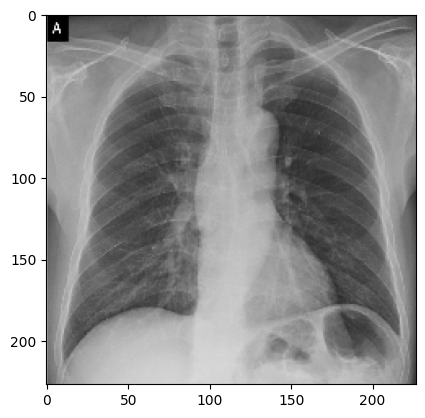

1/1 [==============================] - 0s 114ms/step
[[0.42930835]]
COVID-19


In [ ]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print(score)
if score<0.5:
  print("COVID-19")
else:
  print("Healthy")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   zoom_range=0.4,
                                   horizontal_flip=False,
                                   vertical_flip=True,
                                   fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary')
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import applications
from keras.models import Sequential
from keras.layers import Dropout,Dense,GlobalAveragePooling2D
from keras.models import Model

img_width,img_height=224,224

base_model =applications.VGG19(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))

top_model=Sequential()
top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:],data_format=None))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.25))
top_model.add(Dense(1,activation='sigmoid'))


modeltransfer=Model(inputs=base_model.input,outputs=top_model(base_model.output))

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
modeltransfer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
modeltransfer.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
modeltransfer.fit(train_generator,epochs=25, validation_data=validation_generator)

Epoch 1/25
39/39 [==============================] - 12s 65ms/step - loss: 751943.5625 - accuracy: 0.4872 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/25
39/39 [==============================] - 2s 62ms/step - loss: 0.8416 - accuracy: 0.3333 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 3/25
39/39 [==============================] - 3s 72ms/step - loss: 0.7592 - accuracy: 0.4103 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 4/25
39/39 [==============================] - 2s 60ms/step - loss: 1.1944 - accuracy: 0.5641 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 5/25
39/39 [==============================] - 2s 59ms/step - loss: 0.7602 - accuracy: 0.4359 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 6/25
39/39 [==============================] - 2s 60ms/step - loss: 0.7408 - accuracy: 0.4872 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 7/25
39/39 [==============================] - 3s 67ms/step - loss: 0.7933 - accuracy: 0.3333 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8

In [ ]:
modeltransfer.save_weights("modelTransfer.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/data/TEST/COVID-19.jpeg'

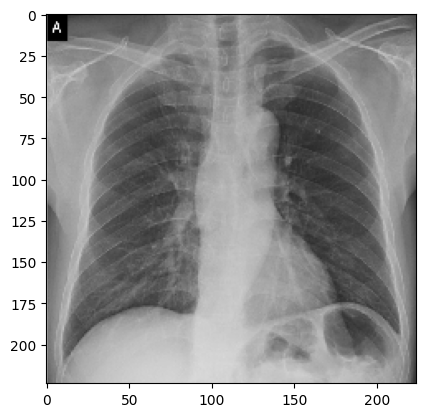

1/1 [==============================] - 0s 170ms/step
Predicted: [[0.49918973]] COVID-19


In [ ]:
img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = modeltransfer.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')